---
# [Continuum Fitting](https://specutils.readthedocs.io/en/stable/fitting.html#continuum-fitting)

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

from astropy.modeling import models
from astropy import units as u

from specutils.spectra import Spectrum1D, SpectralRegion
from specutils.fitting import fit_generic_continuum

<WCSAxes: ylabel='Data [Jy]'>

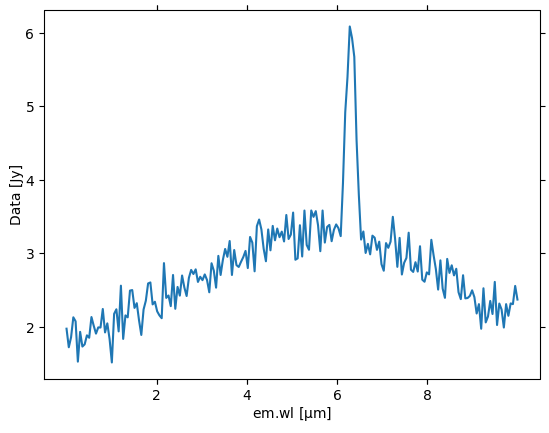

In [3]:
"""
生成模拟光谱
"""
np.random.seed(0)
x = np.linspace(0., 10., 200)
y = 3 * np.exp(-0.5 * (x - 6.3)**2 / 0.1**2)
y += np.random.normal(0., 0.2, x.shape)

y_continuum = 3.2 * np.exp(-0.5 * (x - 5.6)**2 / 4.8**2)
y += y_continuum

spectrum = Spectrum1D(flux=y*u.Jy, spectral_axis=x*u.um)

spectrum.plot()

* 连续谱拟合

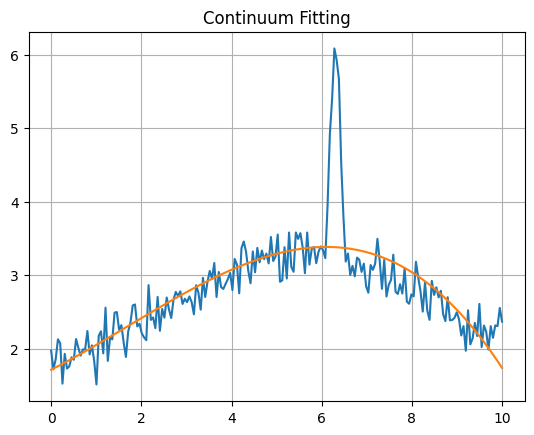

In [19]:
with warnings.catch_warnings():  # Ignore warnings
    warnings.simplefilter('ignore')
    g1_fit = fit_generic_continuum(spectrum)

y_continuum_fitted = g1_fit(x*u.um)

f, ax = plt.subplots()  
ax.plot(x, y)  
ax.plot(x, y_continuum_fitted)  
ax.set_title("Continuum Fitting")  
ax.grid(True)

* 应用: 归一化光谱

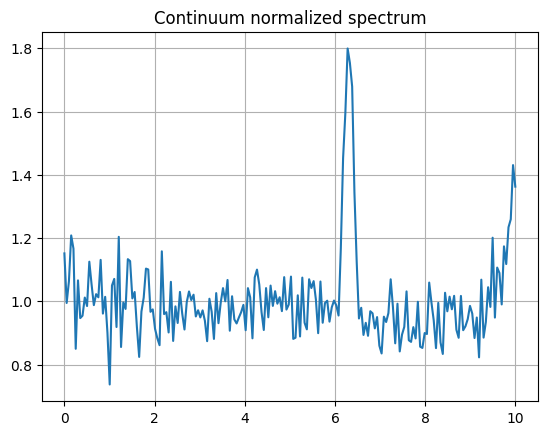

In [20]:
spec_normalized = spectrum / y_continuum_fitted
f, ax = plt.subplots()  
ax.plot(spec_normalized.spectral_axis, spec_normalized.flux)  
ax.set_title("Continuum normalized spectrum")  
ax.grid(True) 

* 指定光谱区拟合连续谱

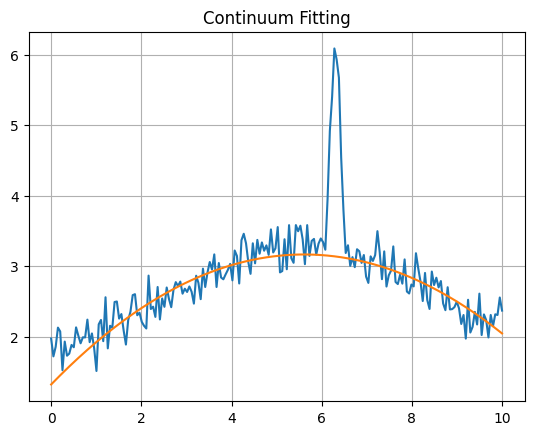

In [22]:
from specutils.fitting.continuum import fit_continuum

np.random.seed(0)
x = np.linspace(0., 10., 200)
y = 3 * np.exp(-0.5 * (x - 6.3) ** 2 / 0.1 ** 2)
y += np.random.normal(0., 0.2, x.shape)
y += 3.2 * np.exp(-0.5 * (x - 5.6) ** 2 / 4.8 ** 2)

spectrum = Spectrum1D(flux=y * u.Jy, spectral_axis=x * u.um)
region = [(1 * u.um, 5 * u.um), (7 * u.um, 10 * u.um)]
with warnings.catch_warnings():  # Ignore warnings
    warnings.simplefilter('ignore')
    fitted_continuum = fit_continuum(spectrum, window=region)
y_fit = fitted_continuum(x*u.um)

f, ax = plt.subplots()  
ax.plot(x, y)  
ax.plot(x, y_fit)  
ax.set_title("Continuum Fitting")  
plt.grid(True)